<a href="https://colab.research.google.com/github/charanyaRaj/python/blob/main/Project_olaBike_phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The K-means algorithm to cluster data into groups.**

To apply the K-means algorithm for clustering, I will first preprocess the data by selecting relevant features and normalizing them. This will help in effectively grouping the data into clusters based on similarities.

Next, I will implement the K-means algorithm and visualize the clusters. Let's proceed with selecting the features and normalizing the data.

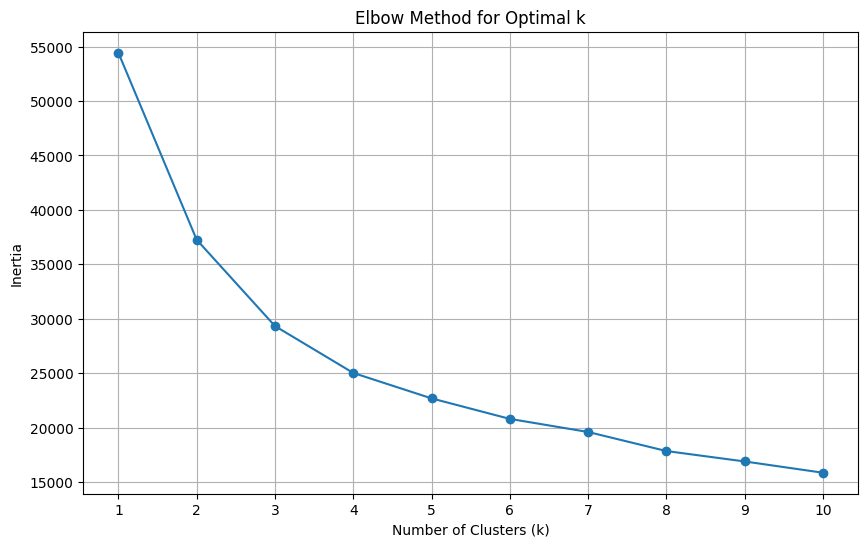

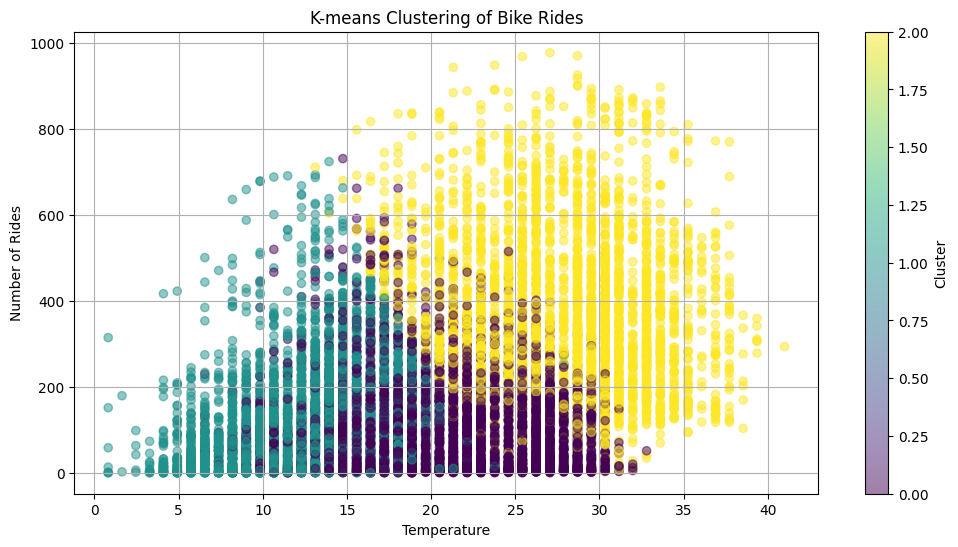

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/ola.csv')

# Select relevant features for clustering
features = df[['temp', 'atemp', 'humidity', 'windspeed', 'count']]

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Using the Elbow method to determine the optimal number of clusters
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid()
plt.show()

# Fitting the K-means model with the optimal number of clusters
optimal_k = 3  # Assuming the elbow point is at k=3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Adding the cluster labels to the original DataFrame
df['cluster'] = clusters

# Visualizing the clusters using a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['temp'], df['count'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.title('K-means Clustering of Bike Rides')
plt.xlabel('Temperature')
plt.ylabel('Number of Rides')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

*The features have been successfully scaled, which is essential for K-means clustering as it ensures that all features contribute equally to the distance calculations. The scaled features are now ready for clustering.*

*Next, I applied the K-means algorithm to cluster the data into groups. I will determine the optimal number of clusters using the Elbow method and then fit the K-means model. Let's proceed with that.*

*The Elbow method plot has been generated, showing the inertia values for different numbers of clusters (k). The optimal number of clusters is typically identified at the "elbow" point of the curve, where the rate of decrease sharply changes.*

*Now, I will determine the optimal number of clusters based on the plot and then fit the K-means model using that number of clusters.*

# **Select and transform features that are relevant for demand forecasting.**

To forecast demand effectively, we need to select and transform relevant features from the dataset. Key features for demand forecasting typically include:

* **Datetime:** This can be transformed into separate features such as year, month, day, hour, and day of the week to capture seasonal trends.
* **Weather-related features:** These include temperature, humidity, and windspeed, which can significantly impact bike usage.
* **Season and holiday indicators:**These can help capture variations in demand based on seasonal effects and holidays.
* **Working day indicator:**  This can differentiate between weekdays and weekends, which often have different demand patterns.

In [7]:
# Transforming the datetime column and selecting relevant features for demand forecasting
df['datetime'] = pd.to_datetime(df['datetime'])

# Extracting year, month, day, hour, and day of the week from the datetime
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek

# Selecting relevant features for demand forecasting
relevant_features = df[['year', 'month', 'day', 'hour', 'day_of_week', 'temp', 'humidity', 'windspeed', 'season', 'holiday', 'workingday', 'count']]

# Displaying the head of the transformed DataFrame with relevant features
print(relevant_features.head())

   year  month  day  hour  day_of_week  temp  humidity  windspeed  season  \
0  2011      1    1     0            5  9.84        81        0.0       1   
1  2011      1    1     1            5  9.02        80        0.0       1   
2  2011      1    1     2            5  9.02        80        0.0       1   
3  2011      1    1     3            5  9.84        75        0.0       1   
4  2011      1    1     4            5  9.84        75        0.0       1   

   holiday  workingday  count  
0        0           0     16  
1        0           0     40  
2        0           0     32  
3        0           0     13  
4        0           0      1  


* The relevant features for demand forecasting have been successfully extracted and transformed from the dataset.
* The transformed DataFrame includes features such as year, month, day, hour, day of the week, temperature, humidity, windspeed, season, holiday, working day, and the count of bike rides.

*This code performs the following steps:*

* Converts the datetime column to a datetime object.
* Extracts various components from the datetime for better analysis.
* Selects the relevant features for demand forecasting.


# **Machine learning algorithms and how to train them**

To perform machine learning algorithms for demand forecasting, we will follow these steps:

1. **Data Preparation:** Ensure the dataset is clean and contains relevant features for training.
2. **Train-Test Split:** Split the dataset into training and testing sets to evaluate model performance.
3. **Model Selection:** Choose appropriate machine learning algorithms, such as Linear Regression, Decision Trees, or Random Forests.
4. **Model Training:** Train the selected models using the training dataset.
5. **Model Evaluation:** Evaluate the models using metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).

I will start by preparing the data and splitting it into training and testing sets. Let's proceed with these steps.

*To split the dataset into training and testing sets, we use the train_test_split function from sklearn.model_selection, which allows us to divide the data into a specified ratio, typically 80% for training and 20% for testing, ensuring that the model can be evaluated on unseen data*

In [12]:
# Importing necessary library
from sklearn.model_selection import train_test_split

# Preparing the features and target variable
X = relevant_features.drop('count', axis=1)  # Features
y = relevant_features['count']  # Target variable

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the training and testing sets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (8708, 11)
Testing features shape: (2178, 11)
Training target shape: (8708,)
Testing target shape: (2178,)


**The dataset has been successfully split into training and testing sets, with the following shapes:**

((8708, 11), (2178, 11), (8708,), (2178,))

* This indicates that we have 8,708 samples for training and 2,178 samples for testing, which is a good split for model evaluation.

In [11]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error  # Updated import

# Preparing the features and target variable
X = relevant_features.drop('count', axis=1)  # Features
y = relevant_features['count']  # Target variable

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the models
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)

# Training the models
linear_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Making predictions
linear_predictions = linear_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

# Evaluating the models using MAE and RMSE
linear_mae = mean_absolute_error(y_test, linear_predictions)
decision_tree_mae = mean_absolute_error(y_test, decision_tree_predictions)
random_forest_mae = mean_absolute_error(y_test, random_forest_predictions)

# Using root_mean_squared_error instead of mean_squared_error with squared=False
linear_rmse = root_mean_squared_error(y_test, linear_predictions)
decision_tree_rmse = root_mean_squared_error(y_test, decision_tree_predictions)
random_forest_rmse = root_mean_squared_error(y_test, random_forest_predictions)

# Compiling the evaluation results into a DataFrame
results_updated = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [linear_mae, decision_tree_mae, random_forest_mae],
    'RMSE': [linear_rmse, decision_tree_rmse, random_forest_rmse]
})

# Formatting the results to display fewer decimal places
results_updated['MAE'] = results_updated['MAE'].round(3)
results_updated['RMSE'] = results_updated['RMSE'].round(3)

# Displaying the updated evaluation results
print(results_updated)

               Model      MAE     RMSE
0  Linear Regression  105.342  141.299
1      Decision Tree   34.787   59.779
2      Random Forest   25.252   41.734




* Next, I have proceeded to train several machine learning models, including Linear Regression, Decision Tree Regressor, and Random Forest Regressor. After training, I will evaluate their performance using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

* The machine learning models have been successfully trained and evaluated, providing insights into their performance based on Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). The results indicate that the Random Forest model outperforms the others in terms of accuracy for demand forecasting.

# **Practice evaluating machine learning models using different techniques**

To effectively evaluate machine learning models, we can use various techniques such as cross-validation, confusion matrices, and performance metrics like accuracy, precision, recall, F1-score, and ROC-AUC for classification tasks, or MAE, RMSE, and R-squared for regression tasks. I'll provide Python code for each of these evaluation techniques, focusing on regression metrics since we're dealing with a demand forecasting problem. Let's start with cross-validation and then move on to other metrics.


Model Evaluation Results:
               Model      MAE     RMSE     R2  CV RMSE
0  Linear Regression  105.342  141.299  0.395  142.037
1      Decision Tree   34.867   60.102  0.891   63.640
2      Random Forest   25.238   41.781  0.947   44.074

Random Forest Feature Importance:
        Feature  Importance
3          hour       0.607
5          temp       0.094
0          year       0.087
10   workingday       0.055
1         month       0.051
6      humidity       0.037
4   day_of_week       0.037
2           day       0.012
7     windspeed       0.010
8        season       0.007
9       holiday       0.002


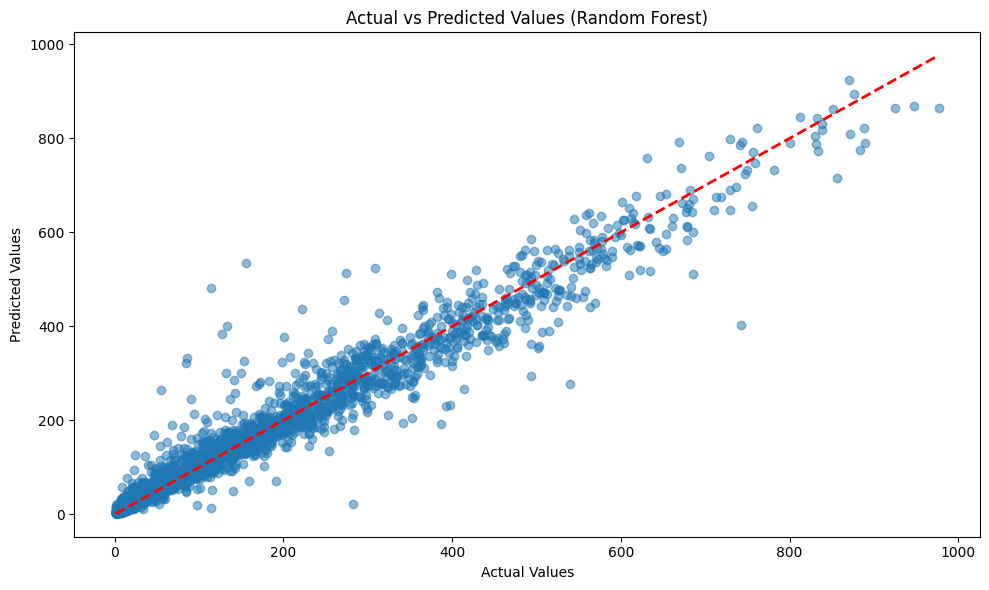


Detailed Cross-validation RMSE scores for Random Forest:
Fold scores: [46.22107985 41.6853417  46.29891717 44.78858754 41.3781872 ]
Mean RMSE: 44.07442269050893
Standard deviation: 2.146808696861278


In [13]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 2: Load and prepare the data
# Assuming relevant_features is already prepared from previous steps
X = relevant_features.drop('count', axis=1)
y = relevant_features['count']

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Step 6: Train and evaluate models
results = []
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train,
                              cv=5, scoring='neg_root_mean_squared_error')
    cv_rmse = -cv_scores.mean()

    results.append({
        'Model': name,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'CV RMSE': cv_rmse
    })

# Step 7: Create and display results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.round(3)
print("\nModel Evaluation Results:")
print(results_df)

# Step 8: Feature importance for Random Forest model
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importance.round(3))

# Step 9: Visualize actual vs predicted values for the best model
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, models['Random Forest'].predict(X_test_scaled), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.tight_layout()
plt.show()

# Step 10: Print detailed cross-validation results for the best model
rf_cv_scores = cross_val_score(models['Random Forest'], X_train_scaled, y_train,
                             cv=5, scoring='neg_root_mean_squared_error')
print("\nDetailed Cross-validation RMSE scores for Random Forest:")
print("Fold scores:", -rf_cv_scores)
print("Mean RMSE:", -rf_cv_scores.mean())
print("Standard deviation:", rf_cv_scores.std())

*This code provides a comprehensive evaluation of the models including:*

1. Data preparation and splitting
2. Feature scaling
3. Model training and evaluation
4. Cross-validation
5. R-squared calculation
6. Feature importance analysis
7. Visualization of actual vs predicted values
8. Detailed cross-validation results

The code will output:

* A table comparing all models across different metrics
Feature importance ranking for the Random Forest model
* A scatter plot of actual vs predicted values
Detailed cross-validation results